<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import accuracy_score
from PIL import Image

## Ερώτημα 1

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Ερώτημα 2

To y είναι το label της εικόνας, άρα το ψηφίο που απεικονίζεται στην εικόνα. Επομένως, για να τυπώσουμε την εικόνα του ψηφίου i, μπορούμε απλά να διαλέξουμε τυχαία μια εικόνα από αυτές που έχουν y=i για label:

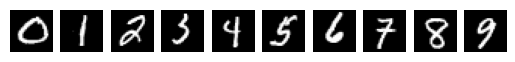

In [4]:
fig, axes = plt.subplots(1, 10)

for i in range(10):
    ax = axes[i]
    idx = np.where(y_train == i)[0]
    rnd_idx = np.random.choice(idx)

    ax.imshow(x_train[rnd_idx], cmap='gray')
    ax.axis('off')

plt.show()

## Ερώτημα 3

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Οι κάθε εικόνα έχει μέγεθος 28x28, δηλαδή 784 pixel. Δεν είναι όλα τα pixel σημαντικά, αφού η αναγνώριση του αριθμού γίνεται από τα άσπρα pixel. Τα περισσότερα από τα μαύρα pixel, που δεν βρίσκονται στο περίγραμμα του ψηφίου, μπορούν να αγνοηθούν.

## Ερώτημα 4

In [6]:
x_train = x_train.reshape(len(x_train), -1)
x_test  = x_test.reshape(len(x_test), -1)
x_train.shape

(60000, 784)

## Ερώτημα 5

In [7]:
N = len(x_train)
k = [5, 15, 51, int(math.sqrt(N))]

accuracies_train = []
accuracies_test = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    accuracies_train.append(accuracy_score(y_train, y_train_pred))
    accuracies_test.append(accuracy_score(y_test, y_test_pred))

print("Train accuracies:", accuracies_train)
print("Test accuracies:", accuracies_test)

Train accuracies: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracies: [0.9688, 0.9633, 0.9533, 0.9241]


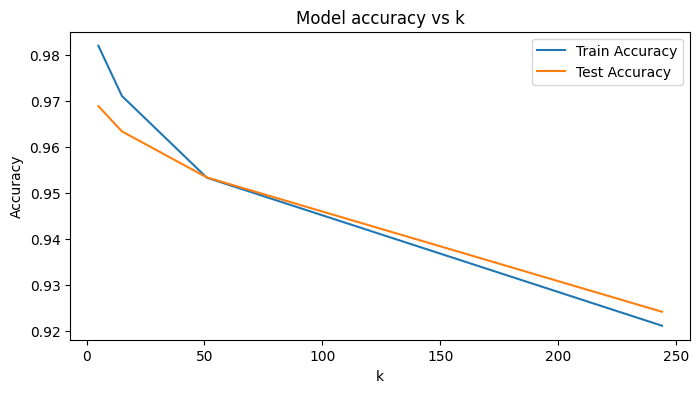

In [8]:
plt.figure(figsize=(8,4))
plt.plot(k, accuracies_train, label='Train Accuracy')
plt.plot(k, accuracies_test, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model accuracy vs k')
plt.legend()
plt.show()

Από το διάγραμμα βλέπουμε ότι η ακρίβεια μειώνεται με αύξηση του αριθμού των πλησιέστερων γειτόνων k. Αυτό είναι λογικό, αφού με αύξηση του αριθμού των γειτόνων, απομακρυνόμαστε από την περιοχή που βρίσκεται το καινούριο σημείο και συμψηφίζουμε δεδομένα που δεν έχουν τόση συσχέτιση με αυτό, τα οποία όμως επηρεάζουν το τελικό αποτέλεσμα.

## Ερώτημα 6

In [92]:
x_train_n = x_train / 255.0
x_test_n = x_test / 255.0

N = len(x_train)
k = [5, 15, 51, int(math.sqrt(N))]
accuracies_train_n = []
accuracies_test_n = []

for i in k:
    knn_n = KNeighborsClassifier(n_neighbors=i)
    knn_n.fit(x_train_n, y_train)

    y_train_pred_n = knn_n.predict(x_train_n)
    y_test_pred_n = knn_n.predict(x_test_n)

    accuracies_train_n.append(accuracy_score(y_train, y_train_pred_n))
    accuracies_test_n.append(accuracy_score(y_test, y_test_pred_n))

print("Train accuracies:", accuracies_train_n)
print("Test accuracies:", accuracies_test_n)

Train accuracies: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracies: [0.9688, 0.9633, 0.9533, 0.9241]


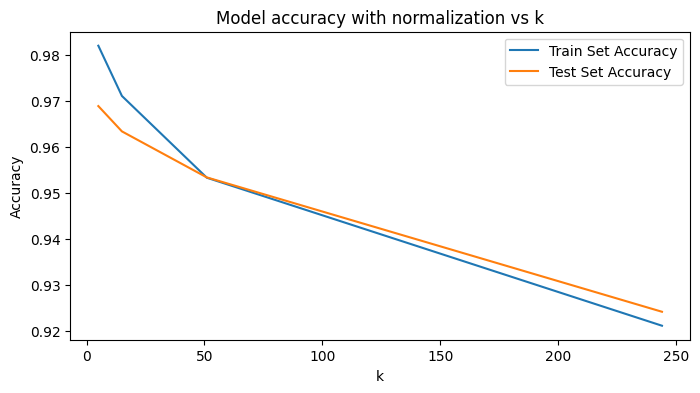

In [10]:
plt.figure(figsize=(8,4))
plt.plot(k, accuracies_train_n, label='Train Set Accuracy')
plt.plot(k, accuracies_test_n, label='Test Set Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model accuracy with normalization vs k')
plt.legend()
plt.show()

Τα δύο μοντέλα έχουν την ίδια ακρίβεια. Το γεγονός αυτό ίσως οφείλεται στο γεγονός ότι δεν υπάρχουν άλλες διαστάσεις που έχουν διαφορετική κλίμακα. Οπότε, η απλή διαίρεση των στοιχείων με έναν σταθερό αριθμό δεν έχει επίδραση στις αποστάσεις που υπολογίζει ο αλγόριθμος.

## Ερώτημα 7

Στην συνέχεια, σχεδιάστηκε το ψηφίο "7" στην ζωγραφική σε εικόνα 28x28. Στην συνέχεια, η εικόνα μετατράπηκε σε ασπρόμαυρη και μετασχηματίστηκε σε διάνυνσμα ώστε να εισαχθεί στον k-NN αλγόριθμο.

In [72]:
img = Image.open("Seven.jpg")
img = img.convert("L")
img.size

(28, 28)

In [73]:
img_ar = np.array(img)
img_ar = img_ar / 255.0

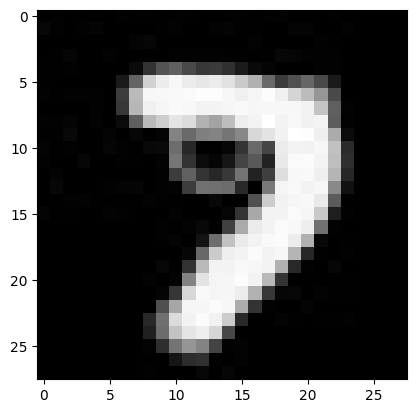

In [74]:
plt.imshow(img, cmap='gray')

In [77]:
img_vect = img_ar.reshape(1, -1)
img_vect.shape

(1, 784)

In [91]:
y_test_seven = knn_n.predict(img_vect)
print("The number in the image is:", y_test_seven[0])

The number in the image is: 7


Το μοντέλο επομένως ταξινομεί σωστά την εικόνα